In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Processed_Eating_Disorder_Data.csv")

In [4]:
df.head()

,Age_Range,Gender,Division_ofOrigin,Current_EducationLevel,Employment_Status,Marital_Status,EatLess_OnWeightGain,EatLess_AtMealtime,RefuseFood_WeightConcern,Monitor_Food,...,Days_FastedToControlShapeOrWeight,Days_ExcludedFoodToControlShapeOrWeight,Days_FollowedRulesToControlShapeOrWeight,Days_FearLosingControlOverEating,Eat_SpecificFoodsHabitually,Location_TriggersHabitualEating,AutomaticEating_WhenExperiencingStrongEmotion,Realize_AfterEatingOutOfHabit,Perception_EatingDisorder,Symptom_Score
0,18-24,Male,Rajshahi,Bachelor's degree 3rd year,Student,In a relationship,3,0,2,2,...,3,1,3,1,3,3,2,0,"Yes, I believe I do",85
1,25-34,Female,Chattogram,Master's degree 2nd year,Self-employed,Married,3,3,1,3,...,2,2,0,2,3,2,0,0,"Yes, I believe I do",88
2,18-24,Male,Khulna,Bachelor's degree 2nd year,Student,Single,3,0,3,1,...,1,1,2,1,0,2,0,0,"Yes, I believe I do",87
3,18-24,Female,Dhaka,Bachelor's degree 2nd year,Self-employed,Married,3,3,0,2,...,1,3,1,1,2,3,3,3,"Yes, I believe I do",89
4,18-24,Male,Sylhet,Bachelor's degree 3rd year,Student,Single,2,0,1,3,...,2,1,1,1,3,3,1,3,"Yes, I believe I do",82


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['Age_Range', 'Gender', 'Division_ofOrigin', 'Current_EducationLevel', 'Employment_Status', 'Marital_Status']]
y = df['Symptom_Score']

In [7]:
X = pd.get_dummies(X,drop_first=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [15]:
X_train_poly = poly.fit_transform(X_train_scaled)

In [17]:
X_test_poly = poly.transform(X_test_scaled)

In [18]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
model = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1], eps=0.001, n_alphas=100, cv=5)

In [21]:
model.fit(X_train_poly,y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.967532458376809, tolerance: 3.8035224431818184
  model = cd_fast.enet_coordinate_descent_gram(


ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [23]:
predictions = model.predict(X_test_poly)

In [24]:
MAE = mean_absolute_error(y_test, predictions)

In [25]:
RMSE = np.sqrt(mean_squared_error(y_test, predictions))

In [26]:
MAE

7.279305604538481

In [27]:
RMSE

np.float64(9.2919714169505)

In [28]:
poly_feature_names = poly.get_feature_names_out(X.columns)
coeffs = pd.Series(model.coef_, index=poly_feature_names)
top_predictors = coeffs[coeffs != 0].sort_values(ascending=False)

In [29]:
top_predictors.head()

Division_ofOrigin_Khulna^2                                                 0.334920
Division_ofOrigin_Mymensingh^2                                             0.227103
Current_EducationLevel_Bachelor's degree 4th year Marital_Status_Single    0.156530
Division_ofOrigin_Rangpur^2                                                0.130085
Gender_Male Current_EducationLevel_Master's degree 2nd year                0.125843
dtype: float64

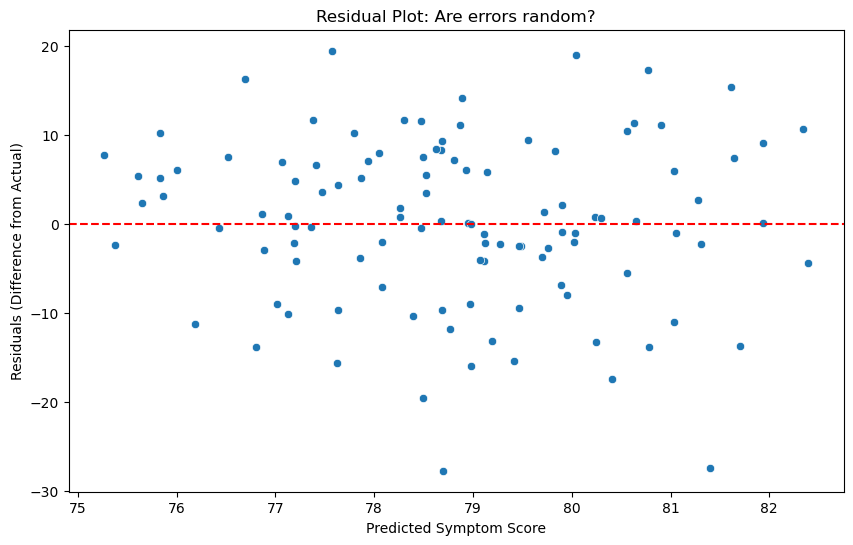

In [30]:
residuals = y_test - predictions

plt.figure(figsize=(10,6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--') # Zero-error line
plt.xlabel('Predicted Symptom Score')
plt.ylabel('Residuals (Difference from Actual)')
plt.title('Residual Plot: Are errors random?')
plt.show()